# Word 2 Vector

converting words to vector Space & Predicting neighbor words using neural network. 

In [1]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()

we will create a dictionary which translates words to integers and integers to words.

In [2]:
words = []
for word in corpus_raw.split():
    if word != '.': 
        words.append(word)
words = set(words)
word2int = {}
int2word = {}
vocab_size = len(words)
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [3]:
print(word2int['queen'])

6


In [5]:
print(int2word[6])

queen


In [6]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [7]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [8]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [9]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [12]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [13]:
print(x_train)

[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0

In [14]:
print(x_train.shape, y_train.shape)
# meaning 34 training points, where each point has 7 dimensions

(34, 7) (34, 7)


# Make the Tensorflow Model

In [15]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [16]:
#we take our training data and convert into the embedded representation.
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [17]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [18]:
#Now, all that’s left is to train it:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.58933
loss is :  3.95514
loss is :  3.47242
loss is :  3.08895
loss is :  2.79429
loss is :  2.58076
loss is :  2.43362
loss is :  2.33347
loss is :  2.26288
loss is :  2.20983
loss is :  2.16722
loss is :  2.13108
loss is :  2.09923
loss is :  2.07044
loss is :  2.044
loss is :  2.01947
loss is :  1.99656
loss is :  1.97508
loss is :  1.95485
loss is :  1.93576
loss is :  1.91771
loss is :  1.90062
loss is :  1.8844
loss is :  1.869
loss is :  1.85436
loss is :  1.84044
loss is :  1.82717
loss is :  1.81453
loss is :  1.80248
loss is :  1.79098
loss is :  1.77999
loss is :  1.7695
loss is :  1.75947
loss is :  1.74988
loss is :  1.74069
loss is :  1.7319
loss is :  1.72348
loss is :  1.71541
loss is :  1.70767
loss is :  1.70024
loss is :  1.69311
loss is :  1.68626
loss is :  1.67968
loss is :  1.67336
loss is :  1.66727
loss is :  1.66141
loss is :  1.65577
loss is :  1.65034
loss is :  1.6451
loss is :  1.64005
loss is :  1.63517
loss is :  1.63046
loss is :  1.62592
l

loss is :  1.37545
loss is :  1.37533
loss is :  1.37522
loss is :  1.3751
loss is :  1.37499
loss is :  1.37487
loss is :  1.37476
loss is :  1.37464
loss is :  1.37453
loss is :  1.37442
loss is :  1.3743
loss is :  1.37419
loss is :  1.37408
loss is :  1.37396
loss is :  1.37385
loss is :  1.37374
loss is :  1.37363
loss is :  1.37351
loss is :  1.3734
loss is :  1.37329
loss is :  1.37318
loss is :  1.37307
loss is :  1.37296
loss is :  1.37285
loss is :  1.37273
loss is :  1.37262
loss is :  1.37251
loss is :  1.3724
loss is :  1.37229
loss is :  1.37218
loss is :  1.37207
loss is :  1.37197
loss is :  1.37186
loss is :  1.37175
loss is :  1.37164
loss is :  1.37153
loss is :  1.37142
loss is :  1.37131
loss is :  1.37121
loss is :  1.3711
loss is :  1.37099
loss is :  1.37088
loss is :  1.37077
loss is :  1.37067
loss is :  1.37056
loss is :  1.37045
loss is :  1.37035
loss is :  1.37024
loss is :  1.37013
loss is :  1.37003
loss is :  1.36992
loss is :  1.36982
loss is :  1.3697

loss is :  1.33847
loss is :  1.33843
loss is :  1.33839
loss is :  1.33835
loss is :  1.33831
loss is :  1.33827
loss is :  1.33823
loss is :  1.33819
loss is :  1.33815
loss is :  1.33811
loss is :  1.33807
loss is :  1.33803
loss is :  1.33799
loss is :  1.33795
loss is :  1.33791
loss is :  1.33787
loss is :  1.33783
loss is :  1.3378
loss is :  1.33776
loss is :  1.33772
loss is :  1.33768
loss is :  1.33764
loss is :  1.3376
loss is :  1.33757
loss is :  1.33753
loss is :  1.33749
loss is :  1.33745
loss is :  1.33741
loss is :  1.33738
loss is :  1.33734
loss is :  1.3373
loss is :  1.33726
loss is :  1.33723
loss is :  1.33719
loss is :  1.33715
loss is :  1.33712
loss is :  1.33708
loss is :  1.33704
loss is :  1.33701
loss is :  1.33697
loss is :  1.33693
loss is :  1.3369
loss is :  1.33686
loss is :  1.33683
loss is :  1.33679
loss is :  1.33676
loss is :  1.33672
loss is :  1.33668
loss is :  1.33665
loss is :  1.33661
loss is :  1.33658
loss is :  1.33654
loss is :  1.336

loss is :  1.32825
loss is :  1.32824
loss is :  1.32823
loss is :  1.32822
loss is :  1.32821
loss is :  1.3282
loss is :  1.32819
loss is :  1.32818
loss is :  1.32817
loss is :  1.32816
loss is :  1.32814
loss is :  1.32813
loss is :  1.32812
loss is :  1.32811
loss is :  1.3281
loss is :  1.32809
loss is :  1.32808
loss is :  1.32807
loss is :  1.32806
loss is :  1.32805
loss is :  1.32804
loss is :  1.32803
loss is :  1.32802
loss is :  1.32801
loss is :  1.328
loss is :  1.32799
loss is :  1.32798
loss is :  1.32797
loss is :  1.32796
loss is :  1.32795
loss is :  1.32794
loss is :  1.32793
loss is :  1.32792
loss is :  1.32791
loss is :  1.3279
loss is :  1.32789
loss is :  1.32788
loss is :  1.32787
loss is :  1.32786
loss is :  1.32785
loss is :  1.32784
loss is :  1.32783
loss is :  1.32782
loss is :  1.32781
loss is :  1.3278
loss is :  1.32779
loss is :  1.32778
loss is :  1.32777
loss is :  1.32776
loss is :  1.32775
loss is :  1.32774
loss is :  1.32773
loss is :  1.32772

loss is :  1.32499
loss is :  1.32499
loss is :  1.32498
loss is :  1.32498
loss is :  1.32498
loss is :  1.32497
loss is :  1.32497
loss is :  1.32496
loss is :  1.32496
loss is :  1.32496
loss is :  1.32495
loss is :  1.32495
loss is :  1.32494
loss is :  1.32494
loss is :  1.32493
loss is :  1.32493
loss is :  1.32493
loss is :  1.32492
loss is :  1.32492
loss is :  1.32491
loss is :  1.32491
loss is :  1.32491
loss is :  1.3249
loss is :  1.3249
loss is :  1.32489
loss is :  1.32489
loss is :  1.32489
loss is :  1.32488
loss is :  1.32488
loss is :  1.32487
loss is :  1.32487
loss is :  1.32487
loss is :  1.32486
loss is :  1.32486
loss is :  1.32485
loss is :  1.32485
loss is :  1.32485
loss is :  1.32484
loss is :  1.32484
loss is :  1.32483
loss is :  1.32483
loss is :  1.32483
loss is :  1.32482
loss is :  1.32482
loss is :  1.32482
loss is :  1.32481
loss is :  1.32481
loss is :  1.3248
loss is :  1.3248
loss is :  1.3248
loss is :  1.32479
loss is :  1.32479
loss is :  1.3247

loss is :  1.32337
loss is :  1.32336
loss is :  1.32336
loss is :  1.32336
loss is :  1.32336
loss is :  1.32336
loss is :  1.32336
loss is :  1.32335
loss is :  1.32335
loss is :  1.32335
loss is :  1.32335
loss is :  1.32335
loss is :  1.32334
loss is :  1.32334
loss is :  1.32334
loss is :  1.32334
loss is :  1.32334
loss is :  1.32333
loss is :  1.32333
loss is :  1.32333
loss is :  1.32333
loss is :  1.32333
loss is :  1.32333
loss is :  1.32332
loss is :  1.32332
loss is :  1.32332
loss is :  1.32332
loss is :  1.32332
loss is :  1.32331
loss is :  1.32331
loss is :  1.32331
loss is :  1.32331
loss is :  1.32331
loss is :  1.32331
loss is :  1.3233
loss is :  1.3233
loss is :  1.3233
loss is :  1.3233
loss is :  1.3233
loss is :  1.32329
loss is :  1.32329
loss is :  1.32329
loss is :  1.32329
loss is :  1.32329
loss is :  1.32329
loss is :  1.32328
loss is :  1.32328
loss is :  1.32328
loss is :  1.32328
loss is :  1.32328
loss is :  1.32327
loss is :  1.32327
loss is :  1.3232

loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32257
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32256
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32255
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32254
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32253
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1.32252
loss is :  1

loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32216
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32215
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32214
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1.32213
loss is :  1

loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32188
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32187
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32186
loss is :  1.32185
loss is :  1.32185
loss is :  1.32185
loss is :  1.32185
loss is :  1.32185
loss is :  1.32185
loss is :  1.32185
loss is :  1

loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32167
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32166
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1.32165
loss is :  1

loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.32151
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
loss is :  1.3215
lo

loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32139
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32138
loss is :  1.32137
loss is :  1.32137
loss is :  1

loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32128
loss is :  1.32127
loss is :  1.32127
loss is :  1.32127
loss is :  1

loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is :  1.3212
loss is : 

loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1.32113
loss is :  1

loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1

loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32102
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1.32101
loss is :  1

loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32098
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1.32097
loss is :  1

loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1.32094
loss is :  1

loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is :  1.3209
loss is : 

loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1.32087
loss is :  1

In [19]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-0.52975792 -0.34758759  0.75561345  0.05094752 -1.93210733]
 [ 1.91869318 -0.457735    1.08701479  0.58564287  2.82806683]
 [ 0.46983203  0.31498823 -0.84547555  1.30670643 -1.15083992]
 [-0.88509405 -1.6230104   0.69682294 -1.07074714 -0.23129039]
 [ 0.24892952 -0.19461393 -2.44951344 -1.52492249  1.45929635]
 [ 1.09599996 -0.9912312   0.64044213 -0.93103933 -0.93355083]
 [-1.47990298 -1.16488504  1.60080028  1.20385587  0.62655771]]
----------
[-0.01365735 -2.78765583 -0.14760762 -0.19151816 -0.71505344]
----------


# Why Hot Vector?
When we multiply the one hot vectors with W1 , we basically get access to the row of the of W1 which is in fact the embedded representation of the word represented by the input one hot vector. So W1is essentially acting as a look up table.

In our case we have also included a bias term b1 so you have to add it.

In [20]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[-0.54341525 -3.13524342  0.60800582 -0.14057064 -2.64716077]
 [ 1.90503585 -3.24539089  0.93940717  0.39412472  2.11301327]
 [ 0.45617467 -2.47266769 -0.99308318  1.11518824 -1.86589336]
 [-0.89875138 -4.41066647  0.54921532 -1.26226532 -0.94634384]
 [ 0.23527217 -2.98226976 -2.597121   -1.71644068  0.74424291]
 [ 1.08234262 -3.77888703  0.49283451 -1.12255752 -1.64860427]
 [-1.49356031 -3.95254087  1.45319271  1.01233768 -0.08849573]]


In [21]:
print(vectors[ word2int['queen'] ])


[-1.49356031 -3.95254087  1.45319271  1.01233768 -0.08849573]


In [23]:

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [24]:
#We will now query these vectors with ‘king’, ‘queen’ and ‘royal’
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

she
king
he


In [47]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [48]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

he -0.976252
is 0.257252
royal -0.539038
king 0.69126
the 0.970148
she -0.390724
queen 0.433848


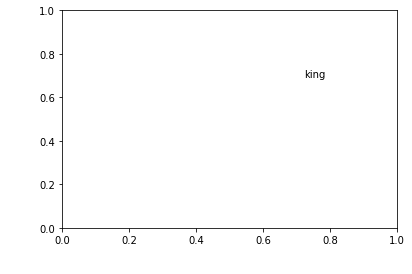

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

In [ ]:
Author:Chandan Kumar Mishra
Credit:aneesh joshi